In [1220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,Normalizer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
import time
import re
from requests.exceptions import RequestException
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb


- [x] URL(not useful) & Icon URL --> regex https://www.edureka.co/blog/web-scraping-with-python/
- [] ID --> not important feature if is all unique (same id from URL) `unique`
- [] name --> from URL (same) `unique`
- [x] subtitle (Web scraping)--> nulls 3749 
- [] In-app Purchases --> don't know ?? https://scikit-learn.org/stable/modules/impute.html or randomforestclacifier model (to fill null)
- [] Developer --> incoding
- [x] age rating --> remove "+" from the end 
- [x] Primary Genre --> incoding "important feature"
- [x] Original Release "Date" --> years and month and day (kam game bt release fl any season as category )
- [x] Current Version Release "Date" --> modet astmrar al game ad eh ?

- [x] Description --> mmkn NLP
 User Rating Count & price & Size & Average User Rating--> numerical valuse

In [1221]:
data = pd.read_csv('games-regression-dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           5214 non-null   object 
 1   ID                            5214 non-null   int64  
 2   Name                          5214 non-null   object 
 3   Subtitle                      1465 non-null   object 
 4   Icon URL                      5214 non-null   object 
 5   User Rating Count             5214 non-null   int64  
 6   Price                         5214 non-null   float64
 7   In-app Purchases              3175 non-null   object 
 8   Description                   5214 non-null   object 
 9   Developer                     5214 non-null   object 
 10  Age Rating                    5214 non-null   object 
 11  Languages                     5203 non-null   object 
 12  Size                          5214 non-null   int64  
 13  Pri

In [1222]:
X = data.drop('Average User Rating', axis=1)
Y=data['Average User Rating']
print(Y.shape)


(5214,)


In [1223]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5


In [1224]:
data["Languages"].iloc[1]

'EN'

In [1225]:
print(data.isnull().sum())

URL                                0
ID                                 0
Name                               0
Subtitle                        3749
Icon URL                           0
User Rating Count                  0
Price                              0
In-app Purchases                2039
Description                        0
Developer                          0
Age Rating                         0
Languages                         11
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Average User Rating                0
dtype: int64


In [1226]:
data.describe()

,ID,User Rating Count,Price,Size,Average User Rating
count,5.214000e+03,5.214000e+03,5214.000000,5.214000e+03,5214.000000
mean,8.679120e+08,3.669878e+03,0.602551,1.379577e+08,4.032988
std,2.941461e+08,4.977621e+04,2.551937,2.526826e+08,0.751854
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05,1.000000
25%,5.954790e+08,1.300000e+01,0.000000,2.751732e+07,3.500000
50%,9.194275e+08,4.900000e+01,0.000000,6.740582e+07,4.000000
75%,1.114815e+09,3.320000e+02,0.000000,1.592689e+08,4.500000
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09,5.000000


In [1227]:
def donutChar(x):
    plt.style.use('classic')
    plt.style.use('Solarize_Light2')
    data.groupby(x).count()['Average User Rating'].plot(kind='pie', autopct= '%.2f', figsize=(20,14),subplots=True, wedgeprops=dict(width=0.40))
    plt.title('Distribution of '+x)
    plt.show()

In [1228]:
#donutChar('Developer')

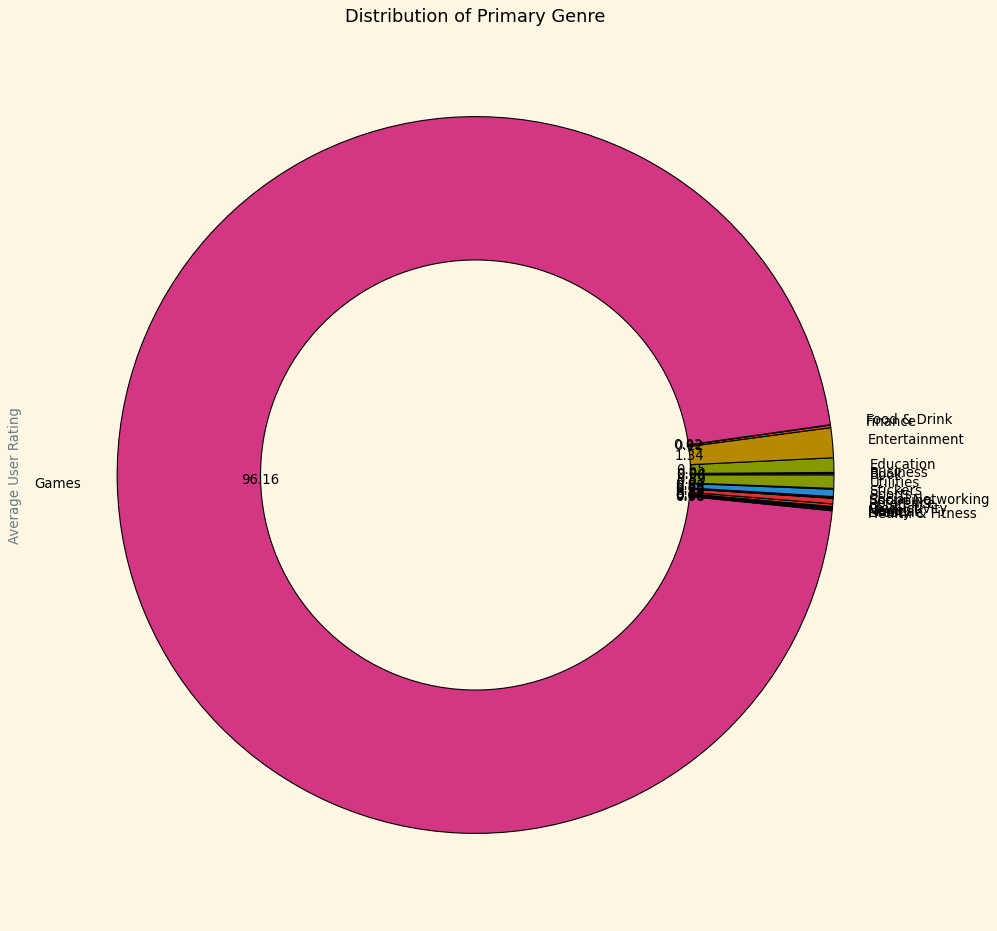

In [1229]:
donutChar('Primary Genre')

In [1230]:
#remove null from languages
data = data.fillna({'Languages':'EN'})
print(data.isnull().sum())

#fill null in subtitle with its name
#data['Subtitle'] = data['Subtitle'].fillna(data['Name'])

URL                                0
ID                                 0
Name                               0
Subtitle                        3749
Icon URL                           0
User Rating Count                  0
Price                              0
In-app Purchases                2039
Description                        0
Developer                          0
Age Rating                         0
Languages                          0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Average User Rating                0
dtype: int64


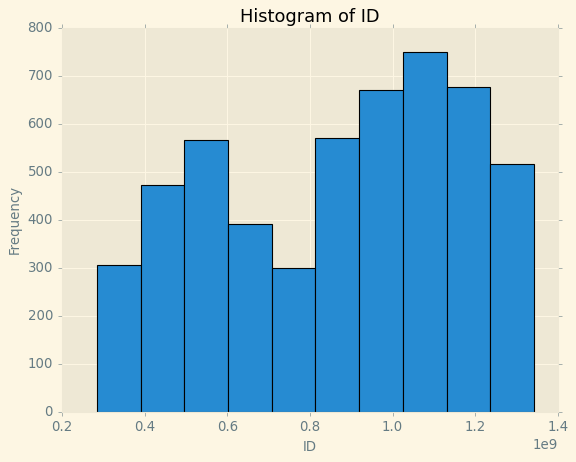

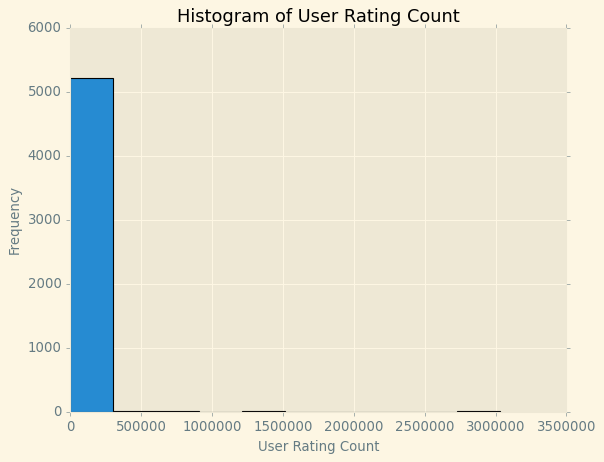

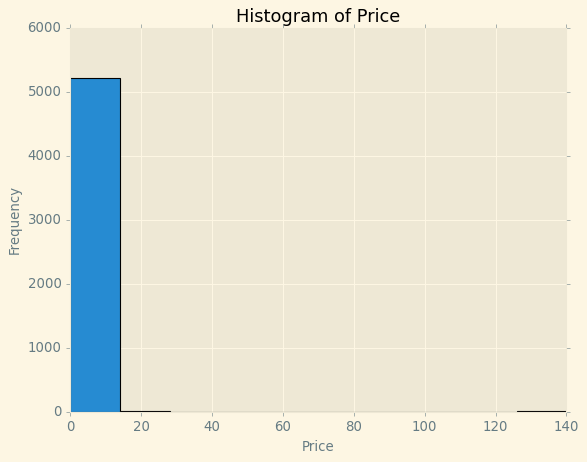

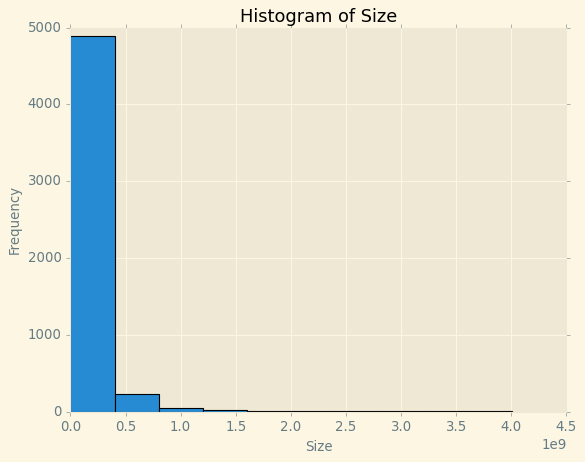

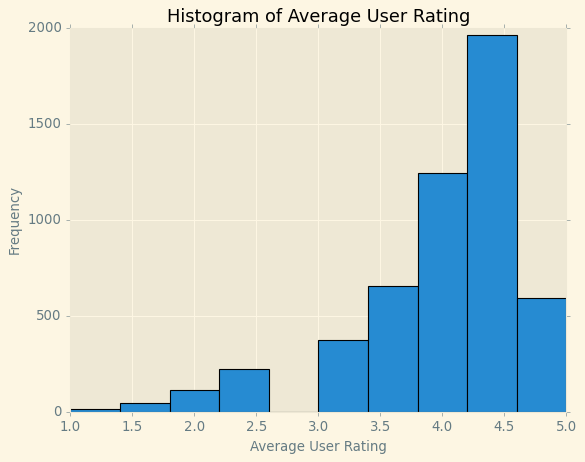

In [1231]:
import matplotlib.pyplot as plt

# Loop through all columns
for col in data.select_dtypes(include='number').columns:
    # Draw a histogram for the current column
    plt.hist(data[col], edgecolor="black")
    plt.title("Histogram of {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

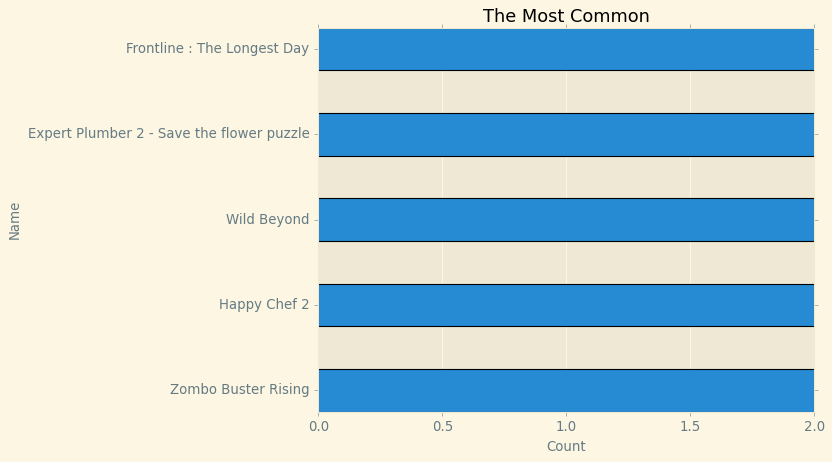

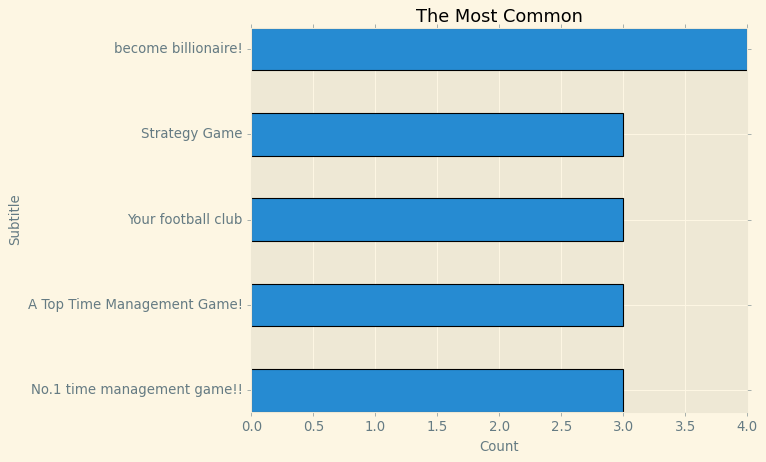

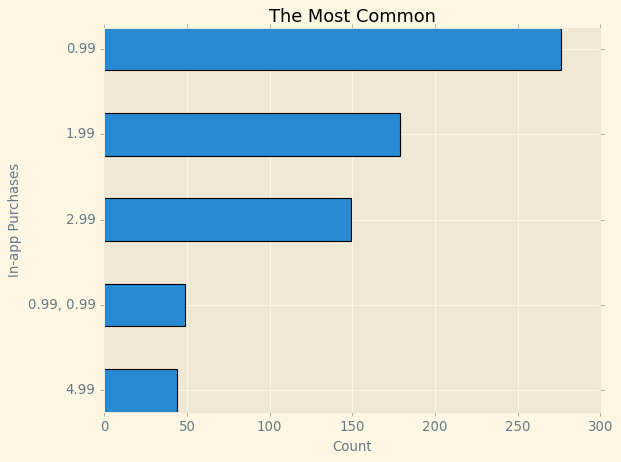

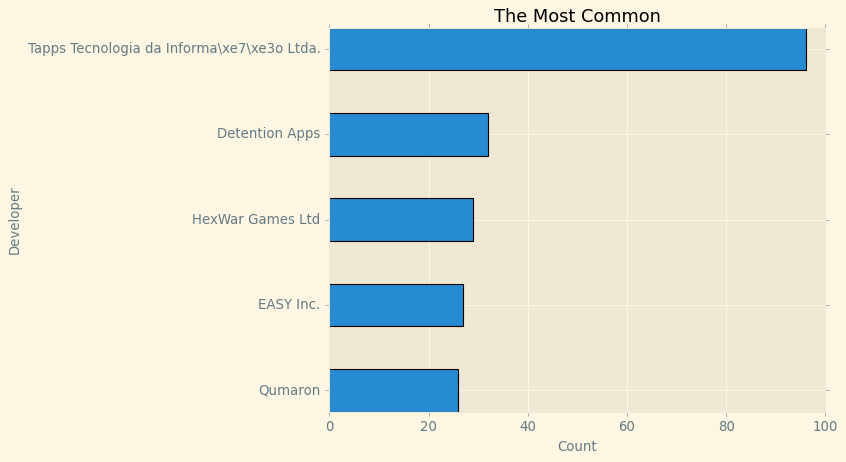

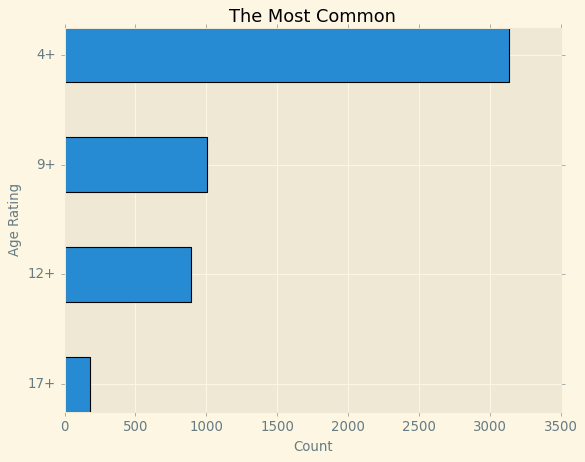

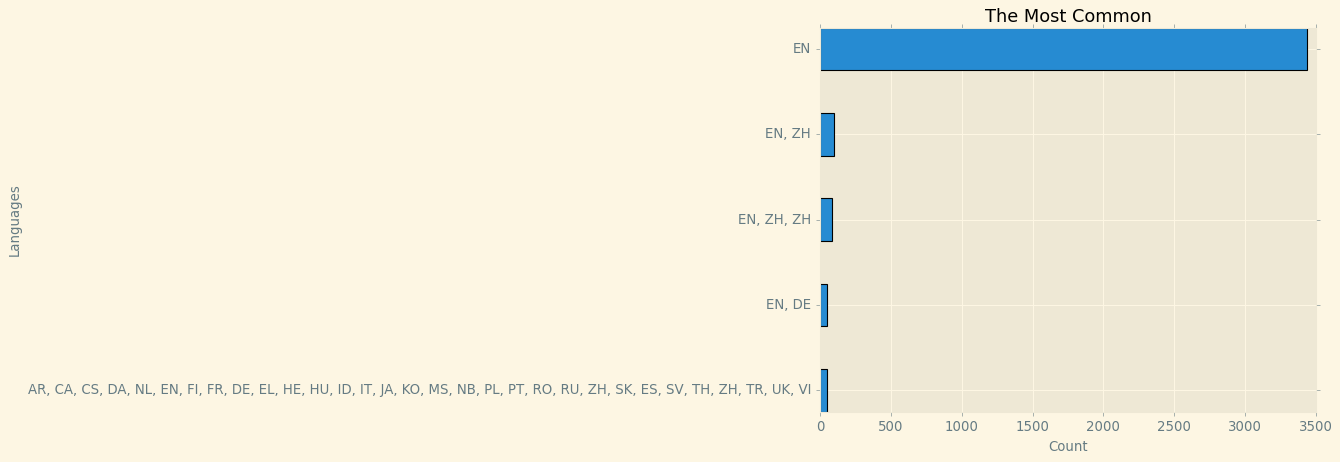

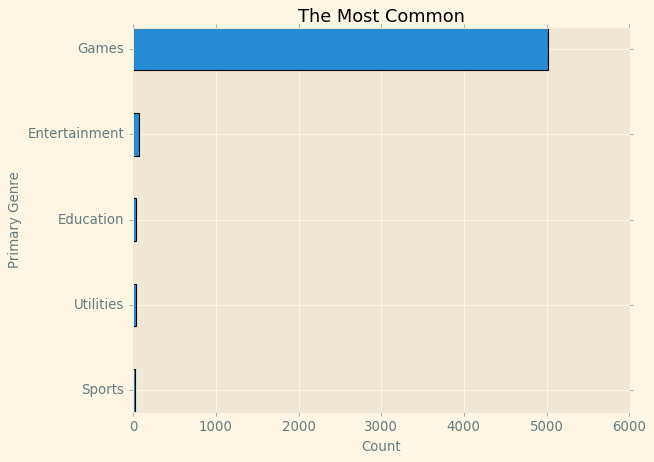

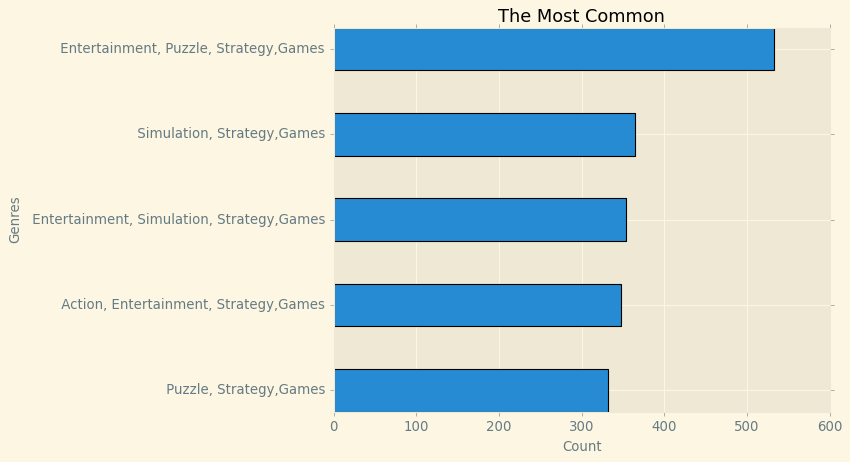

In [1232]:
# Preprocess "Genres" column by sorting individual values in each row
data['Genres'] = data['Genres'].apply(lambda x: ','.join(sorted(x.split(','))))

# Create a list of columns to visualize
columns = ["Name", "Subtitle", "In-app Purchases", "Developer", "Age Rating", "Languages", "Primary Genre", "Genres", "Average User Rating"]

# Loop through the selected columns
for col in columns:
  if data[col].dtype == 'object':
        # Get the counts of each category in the column
        counts = data[col].value_counts()
        
        # Create a horizontal bar plot
        plt.barh(counts.index[:5], counts.values[:5], height=0.5) # Top 5
        # plt.barh(counts.index[:5], counts.values[:5], height=0.5, edgecolor="black") # Top 5

        # Add labels and title
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.title("The Most Common")
        
        # Invert the y-axis to show the most common categories at the top
        plt.gca().invert_yaxis()
        
        # Show the plot
        plt.show()

In [1233]:
#data = data[data['User Rating Count'] >= 100]


In [1234]:
# Size of game
# 25% of game size is 2.751732e+07, 50% is 6.740582e+07,75% is 1.592689e+08. Split into 4 categories
data['size_Q1'] = data['Size'].apply(lambda x: 1 if x < 2.751732e+07 else 0)
data['size_Q2'] = data['Size'].apply(lambda x: 1 if 2.751732e+07 <= x < 6.740582e+07 else 0)
data['size_Q3'] = data['Size'].apply(lambda x: 1 if 6.740582e+07 <= x < 1.592689e+08 else 0)
data['size_Q4'] = data['Size'].apply(lambda x: 1 if x >= 1.592689e+08 else 0)

# Num of words in description
data['Num_words_description'] = data['Description'].apply(lambda x: len(re.findall('(\w+)',str(x))))

In [1235]:
# Includes subtitle? (y/n)
data['Subtitle'] = data['Subtitle'].fillna('') #No data will be taken as empty string
data['subtitle_yes_no'] = data['Subtitle'].apply(lambda x: 0 if x == '' else 1)

# In app purchases categories and dummy variables
data['In-app Purchases'] = data['In-app Purchases'].fillna('0.0') #No data will be taken as $0
data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: x.split(', ')) #turn string into list
print(data['In-app Purchases'])
# Prices range from 0 to 99.99. Split into 4 quadrants
data['In-App-Q1'] = data['In-app Purchases'].apply(lambda x: 1 if any(float(i) < 25 for i in x) else 0) #prices from 0 to 24.99
data['In-App-Q2'] = data['In-app Purchases'].apply(lambda x: 1 if any(25 <= float(i) < 50 for i in x) else 0) #prices from 25 to 49.99
data['In-App-Q3'] = data['In-app Purchases'].apply(lambda x: 1 if any(50 <= float(i) < 75 for i in x) else 0) #prices from 50 to 74.99
data['In-App-Q4'] = data['In-app Purchases'].apply(lambda x: 1 if any(75 <= float(i) < 100 for i in x) else 0) #prices from 75 to 99.99

print(data['In-App-Q1'])
print(data['In-App-Q2'])
print(data['In-App-Q3'])
print(data['In-App-Q4'])


0       [29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99,...
1                                                   [0.0]
2                                                   [0.0]
3                                                   [0.0]
4                                                   [0.0]
                              ...                        
5209    [1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.9...
5210    [2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19...
5211                                                [0.0]
5212    [9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9....
5213         [0.99, 1.99, 0.99, 4.99, 9.99, 19.99, 49.99]
Name: In-app Purchases, Length: 5214, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
5209    1
5210    1
5211    1
5212    1
5213    1
Name: In-App-Q1, Length: 5214, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
5209    0
5210    0
5211    0
5212    1
5213    1
Name: In-App-Q2, Length: 5214, dtype: int64
0 

# Split the data

In [1236]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Average User Rating', axis=1), data['Average User Rating'], test_size=0.20, random_state=42)

In [1237]:
#!pip install webdriver-manager

In [1238]:
'''
import requests

url = 'https://apps.apple.com/us/app/heir-of-light/id1264483706'
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.' }

response = requests.get(url, headers=headers)
print(response.ok)
print(response.text)
'''

"\nimport requests\n\nurl = 'https://apps.apple.com/us/app/heir-of-light/id1264483706'\nheaders = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.' }\n\nresponse = requests.get(url, headers=headers)\nprint(response.ok)\nprint(response.text)\n"

In [1239]:
'''
# iterate over rows in the Subtitle column where value is null
for index, row in data.loc[data["Subtitle"].isnull()].iterrows():
    url = row["URL"]
    #time.sleep(5)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.72 Safari/537.36'}
    response = requests.get(url,headers=headers)
    # check for successful response
    if response.ok:
        # parse HTML source code
        soup = BeautifulSoup(response.content, "html.parser")

        # extract subtitle data
        try:
            subtitle_text = soup.select_one("h2.product-header__subtitle.app-header__subtitle").text.strip()
        except AttributeError:
            subtitle_text = ""

        # fill in the null cell with subtitle data
        data.loc[index, "Subtitle"] = subtitle_text

    else:
        data.loc[index, "Subtitle"] = data.loc[index, "Name"]
        print(f"Error: Could not download HTML source code for URL {url}")
'''


'\n# iterate over rows in the Subtitle column where value is null\nfor index, row in data.loc[data["Subtitle"].isnull()].iterrows():\n    url = row["URL"]\n    #time.sleep(5)\n    headers = {\'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.72 Safari/537.36\'}\n    response = requests.get(url,headers=headers)\n    # check for successful response\n    if response.ok:\n        # parse HTML source code\n        soup = BeautifulSoup(response.content, "html.parser")\n\n        # extract subtitle data\n        try:\n            subtitle_text = soup.select_one("h2.product-header__subtitle.app-header__subtitle").text.strip()\n        except AttributeError:\n            subtitle_text = ""\n\n        # fill in the null cell with subtitle data\n        data.loc[index, "Subtitle"] = subtitle_text\n\n    else:\n        data.loc[index, "Subtitle"] = data.loc[index, "Name"]\n        print(f"Error: Could not download HTML source code fo

In [1240]:
'''
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train[['Primary Genre']])
X_train_encoded = encoder.transform(x_train[['Primary Genre']])
X_test_encoded = encoder.transform(x_test[['Primary Genre']])

# Create dataframes from encoded data and feature names
feature_names = encoder.get_feature_names(['Primary Genre'])
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=feature_names)

# Concatenate encoded dataframes with X_train and X_test
x_train = pd.concat([x_train.reset_index(drop=True), X_train_encoded_df], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), X_test_encoded_df], axis=1)

# Print the first 50 rows of the encoded test data
print(feature_names)

# Check for missing values
print('Missing values in X_train:\n', x_train.isnull().sum())
print('Missing values in X_test:\n', x_test.isnull().sum())
'''

"\nencoder = OneHotEncoder(handle_unknown='ignore')\nencoder.fit(x_train[['Primary Genre']])\nX_train_encoded = encoder.transform(x_train[['Primary Genre']])\nX_test_encoded = encoder.transform(x_test[['Primary Genre']])\n\n# Create dataframes from encoded data and feature names\nfeature_names = encoder.get_feature_names(['Primary Genre'])\nX_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names)\nX_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=feature_names)\n\n# Concatenate encoded dataframes with X_train and X_test\nx_train = pd.concat([x_train.reset_index(drop=True), X_train_encoded_df], axis=1)\nx_test = pd.concat([x_test.reset_index(drop=True), X_test_encoded_df], axis=1)\n\n# Print the first 50 rows of the encoded test data\nprint(feature_names)\n\n# Check for missing values\nprint('Missing values in X_train:\n', x_train.isnull().sum())\nprint('Missing values in X_test:\n', x_test.isnull().sum())\n"

In [1241]:

# create a label encoder instance and fit it on the training data
encoder = LabelEncoder()
print(encoder.fit(x_train["Primary Genre"]))

# encode the "Primary Genre" feature for both the training and testing data using the encoding values from the training data
x_train["Primary Genre"] = encoder.transform(x_train["Primary Genre"])
x_test["Primary Genre"] = encoder.transform(x_test["Primary Genre"])

x_test["Primary Genre"].head(50)


LabelEncoder()


1897    6
877     6
4431    6
4979    6
1595    6
3718    6
893     6
1292    6
1168    6
1144    6
4858    3
553     6
4366    6
3557    6
1736    6
4162    6
1321    6
2732    6
23      6
3961    6
4190    6
2229    6
530     6
2456    6
4348    6
1869    6
3592    6
681     6
168     3
333     6
3543    6
3433    6
3982    6
4005    6
3471    6
3781    6
2955    6
373     6
896     6
2225    6
3570    6
4751    6
4443    6
1086    6
800     6
505     6
1491    6
1220    6
491     6
4044    6
Name: Primary Genre, dtype: int32

In [1242]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

URL                             0
ID                              0
Name                            0
Subtitle                        0
Icon URL                        0
User Rating Count               0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
size_Q1                         0
size_Q2                         0
size_Q3                         0
size_Q4                         0
Num_words_description           0
subtitle_yes_no                 0
In-App-Q1                       0
In-App-Q2                       0
In-App-Q3                       0
In-App-Q4                       0
dtype: int64
URL                             0
ID                              0
N

In [1243]:
x_train.head()
scale_mapper = {"4+":4, "9+":9, "12+":12, "17+":17}
x_train["Age Rating"] = x_train["Age Rating"].replace(scale_mapper)
x_test["Age Rating"] = x_test["Age Rating"].replace(scale_mapper)
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 2173 to 860
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      4171 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              4171 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   int64  
 11  Languages                     4171 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [1244]:
'''
# create a label encoder instance and fit it on the training data
le = LabelEncoder()
le.fit(x_train[["Age Rating"]])

# encode the "Primary Genre" feature for both the training and testing data using the encoding values from the training data
x_train["Age Rating"] = le.transform(x_train[["Age Rating"]])
x_test["Age Rating"] = le.transform(x_test[["Age Rating"]])

x_train.info()
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())
'''

'\n# create a label encoder instance and fit it on the training data\nle = LabelEncoder()\nle.fit(x_train[["Age Rating"]])\n\n# encode the "Primary Genre" feature for both the training and testing data using the encoding values from the training data\nx_train["Age Rating"] = le.transform(x_train[["Age Rating"]])\nx_test["Age Rating"] = le.transform(x_test[["Age Rating"]])\n\nx_train.info()\nprint(x_train.isnull().sum())\nprint(x_test.isnull().sum())\nprint(y_train.isnull().sum())\nprint(y_test.isnull().sum())\n'

In [1245]:
def date(data,x):
    data[x] = pd.to_datetime(data[x], dayfirst=True,infer_datetime_format=True)
    data[x[0]+'_Year'] = pd.DatetimeIndex(data[x]).year
    data[x[0]+'_Month'] = pd.DatetimeIndex(data[x]).month
    data[x[0]+'_Day'] = pd.DatetimeIndex(data[x]).day
    data[x]=data[x].map(datetime.toordinal)


In [1246]:
date(x_train,'Original Release Date')
date(x_train,'Current Version Release Date')

x_train['DifferentDate'] = x_train['Current Version Release Date'] - x_train['Original Release Date']

date(x_test,'Original Release Date')
date(x_test,'Current Version Release Date')

x_test['DifferentDate'] = x_test['Current Version Release Date'] - x_test['Original Release Date']

In [1247]:
print(x_train.columns)
print(x_train.shape)

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date', 'size_Q1', 'size_Q2', 'size_Q3',
       'size_Q4', 'Num_words_description', 'subtitle_yes_no', 'In-App-Q1',
       'In-App-Q2', 'In-App-Q3', 'In-App-Q4', 'O_Year', 'O_Month', 'O_Day',
       'C_Year', 'C_Month', 'C_Day', 'DifferentDate'],
      dtype='object')
(4171, 34)


In [1248]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 2173 to 860
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      4171 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              4171 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   int64  
 11  Languages                     4171 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [1249]:
# create a random forest regression model
features = ["User Rating Count", "Age Rating", "Price", "Size" ,"Original Release Date","Current Version Release Date","O_Year","O_Month","O_Day","C_Year","C_Month","C_Day","DifferentDate"]
print(len(features))
model1 = RandomForestRegressor(random_state=42)

# fit the model on the training data
model1.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model1.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)

13
Mean Squared Error:  0.46253180728667304
Accuracy:  0.1941576114757303


In [1250]:
x_train["Languages"].head(10)

2173                                                   EN
927                                                EN, DE
2499                                                   EN
45                                                     EN
1741                                                   EN
2275                                                   EN
3710    AR, DA, NL, EN, FR, DE, ID, IT, JA, KO, MS, NB...
5035                                                   EN
4607       EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, ZH, TR
283                                                EN, FR
Name: Languages, dtype: object

In [1251]:

from sklearn.preprocessing import MultiLabelBinarizer

# Split the values in the "Languages" feature using a comma and a space
x_train["Languages"] = x_train["Languages"].str.split(", ")

# Create an instance of the MultiLabelBinarizer and fit it on the "Languages" feature in x_train
MLB = MultiLabelBinarizer()
MLB.fit(x_train["Languages"])

# Transform the "Languages" feature into binary vectors for both x_train and x_test
x_train_Languages_encoded = MLB.transform(x_train["Languages"])

x_test["Languages"] = x_test["Languages"].str.split(", ")
x_test_Languages_encoded = MLB.transform(x_test["Languages"])

# Create new feature names based on the original category names
new_feature_names = ['Languages_' + name for name in MLB.classes_]

# Add the encoded "Languages" feature to both x_train and x_test
x_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_Languages_encoded, columns=new_feature_names)], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_Languages_encoded, columns=new_feature_names)], axis=1)


print(x_test.head(1)['Languages_RU'])
print(len(new_feature_names))

# create a random forest regression model
#features = ["User Rating Count", "Age Rating", "Price", "Size", "Primary Genre","Original Release Date","Current Version Release Date","O_Year","O_Month","O_Day","C_Year","C_Month","C_Day","DifferentDate"]
features = features + new_feature_names
print(len(features))

model2 = RandomForestRegressor(random_state=42)

# fit the model on the training data
model2.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model2.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)



0    1
Name: Languages_RU, dtype: int32
113
126
Mean Squared Error:  0.45274534995206134
Accuracy:  0.21120798948103459


In [1252]:
columns_to_keep = [c for c in x_train.columns if c.startswith('Languages')]
print(x_train[columns_to_keep].head(6))

  Languages  Languages_AF  Languages_AM  Languages_AR  Languages_AS  \
0      [EN]             0             0             0             0   
1  [EN, DE]             0             0             0             0   
2      [EN]             0             0             0             0   
3      [EN]             0             0             0             0   
4      [EN]             0             0             0             0   
5      [EN]             0             0             0             0   

   Languages_AY  Languages_AZ  Languages_BE  Languages_BG  Languages_BN  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   
5             0       

In [1253]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the values in the "Genres" feature using a comma and a space
x_train["Genres"] = x_train["Genres"].str.split(", ")
x_test["Genres"] = x_test["Genres"].str.split(", ")

# Create an instance of the MultiLabelBinarizer and fit it on the "Genres" feature in x_train
multiLB = MultiLabelBinarizer()
multiLB.fit(x_train["Genres"])

# Transform the "Genres" feature into binary vectors for both x_train and x_test
x_train_Genres_encoded = multiLB.transform(x_train["Genres"])
x_test_Genres_encoded = multiLB.transform(x_test["Genres"])

# Create new feature names based on the original category names
new_feature_names = ['Genres_' + name for name in multiLB.classes_]
print(new_feature_names)
# Add the encoded "Genres" feature to both x_train and x_test
x_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_Genres_encoded, columns=new_feature_names)], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_Genres_encoded, columns=new_feature_names)], axis=1)

print(len(new_feature_names))

# create a random forest regression model
features = features + new_feature_names
print(len(features))

model3 = RandomForestRegressor(random_state=42)

# fit the model on the training data
model3.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model3.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)

['Genres_ Action', 'Genres_ Adventure', 'Genres_ Board', 'Genres_ Books', 'Genres_ Business', 'Genres_ Card', 'Genres_ Casino', 'Genres_ Casual', 'Genres_ Education', 'Genres_ Entertainment', 'Genres_ Family', 'Genres_ Finance', 'Genres_ Food & Drink', 'Genres_ Games', 'Genres_ Health & Fitness', 'Genres_ Lifestyle', 'Genres_ Medical', 'Genres_ Music', 'Genres_ Navigation', 'Genres_ News', 'Genres_ Photo & Video', 'Genres_ Productivity', 'Genres_ Puzzle', 'Genres_ Racing', 'Genres_ Reference', 'Genres_ Role Playing', 'Genres_ Simulation', 'Genres_ Social Networking', 'Genres_ Sports', 'Genres_ Strategy', 'Genres_ Strategy,Games', 'Genres_Books', 'Genres_Business', 'Genres_Education', 'Genres_Emoji & Expressions', 'Genres_Entertainment', 'Genres_Family', 'Genres_Finance', 'Genres_Food & Drink', 'Genres_Games', 'Genres_Gaming', 'Genres_Health & Fitness', 'Genres_Kids & Family', 'Genres_Lifestyle', 'Genres_Music', 'Genres_News', 'Genres_Photo & Video', 'Genres_Productivity', 'Genres_Puzzl

c:\Users\martina\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['Strategy,Books'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


Mean Squared Error:  0.4306920661553212
Accuracy:  0.24963014901600922


In [1254]:
#x_train = x_train.drop(columns='Genres_Games' ,axis=1)
#x_test = x_test.drop(columns='Genres_Games' ,axis=1)

In [1255]:
'''
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

print(x_train["In-app Purchases"])
# create an iterative imputer instance
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

# fit the imputer on the training data
imputer.fit(x_train[features])

# impute the missing values in the "In-app Purchases" feature for the training data only
x_train["In-app Purchases"] = imputer.transform(x_train[features])[:, 0]

# impute the missing values in the "In-app Purchases" feature for the testing data
x_test["In-app Purchases"] = imputer.transform(x_test[features])[:, 0]
'''

'\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.ensemble import RandomForestRegressor\n\nprint(x_train["In-app Purchases"])\n# create an iterative imputer instance\nimputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)\n\n# fit the imputer on the training data\nimputer.fit(x_train[features])\n\n# impute the missing values in the "In-app Purchases" feature for the training data only\nx_train["In-app Purchases"] = imputer.transform(x_train[features])[:, 0]\n\n# impute the missing values in the "In-app Purchases" feature for the testing data\nx_test["In-app Purchases"] = imputer.transform(x_test[features])[:, 0]\n'

In [1256]:
'''
#fill null in "In-app Purchases" with  0
x_train["In-app Purchases"] = x_train["In-app Purchases"].fillna(0)

x_test["In-app Purchases"] = x_test["In-app Purchases"].fillna(0)
'''

'\n#fill null in "In-app Purchases" with  0\nx_train["In-app Purchases"] = x_train["In-app Purchases"].fillna(0)\n\nx_test["In-app Purchases"] = x_test["In-app Purchases"].fillna(0)\n'

In [1257]:
x_train["In-app Purchases"].isnull().sum()

0

In [1258]:
'''
le = LabelEncoder()
le.fit(x_train["In-app Purchases"].apply(str).unique())

# Apply the label encoder to the column of lists
x_train["In-app Purchases"] = x_train["In-app Purchases"].apply(str).apply(le.transform)
x_test["In-app Purchases"] = x_test["In-app Purchases"].apply(str).apply(le.transform)

'''

'\nle = LabelEncoder()\nle.fit(x_train["In-app Purchases"].apply(str).unique())\n\n# Apply the label encoder to the column of lists\nx_train["In-app Purchases"] = x_train["In-app Purchases"].apply(str).apply(le.transform)\nx_test["In-app Purchases"] = x_test["In-app Purchases"].apply(str).apply(le.transform)\n\n'

In [1259]:
'''
from sklearn.preprocessing import MultiLabelBinarizer

# Split the values in the "Developer" feature using a comma and a space
x_train["Developer"] = x_train["Developer"].str.split(", ")
x_test["Developer"] = x_test["Developer"].str.split(", ")

# Create an instance of the MultiLabelBinarizer and fit it on the "Developer" feature in x_train
mlb = MultiLabelBinarizer()
mlb.fit(x_train["Developer"])

# Transform the "Developer" feature into binary vectors for both x_train and x_test
x_train_developer_encoded = mlb.transform(x_train["Developer"])
x_test_developer_encoded = mlb.transform(x_test["Developer"])

# Create new feature names based on the original category names
new_feature_names = ['developer_' + name for name in mlb.classes_]

# Add the encoded "Developer" feature to both x_train and x_test
x_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_developer_encoded, columns=new_feature_names)], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_developer_encoded, columns=new_feature_names)], axis=1)

print(len(new_feature_names))

# create a random forest regression model
features = features + new_feature_names
model5 = RandomForestRegressor(random_state=42)

# fit the model on the training data
model5.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model5.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)
'''


'\nfrom sklearn.preprocessing import MultiLabelBinarizer\n\n# Split the values in the "Developer" feature using a comma and a space\nx_train["Developer"] = x_train["Developer"].str.split(", ")\nx_test["Developer"] = x_test["Developer"].str.split(", ")\n\n# Create an instance of the MultiLabelBinarizer and fit it on the "Developer" feature in x_train\nmlb = MultiLabelBinarizer()\nmlb.fit(x_train["Developer"])\n\n# Transform the "Developer" feature into binary vectors for both x_train and x_test\nx_train_developer_encoded = mlb.transform(x_train["Developer"])\nx_test_developer_encoded = mlb.transform(x_test["Developer"])\n\n# Create new feature names based on the original category names\nnew_feature_names = [\'developer_\' + name for name in mlb.classes_]\n\n# Add the encoded "Developer" feature to both x_train and x_test\nx_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_developer_encoded, columns=new_feature_names)], axis=1)\nx_test = pd.concat([x_test.reset_ind

In [1260]:
len(features)

208

In [1261]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

URL                        0
ID                         0
Name                       0
Subtitle                   0
Icon URL                   0
                          ..
Genres_Trivia,Games        0
Genres_Trivia,Utilities    0
Genres_Utilities,Games     0
Genres_Word,Books          0
Genres_Word,Games          0
Length: 229, dtype: int64
URL                        0
ID                         0
Name                       0
Subtitle                   0
Icon URL                   0
                          ..
Genres_Trivia,Games        0
Genres_Trivia,Utilities    0
Genres_Utilities,Games     0
Genres_Word,Books          0
Genres_Word,Games          0
Length: 229, dtype: int64
0
0


In [1262]:
print(x_train.shape)
x_train.info()

(4171, 229)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Columns: 229 entries, URL to Genres_Word,Games
dtypes: float64(1), int32(196), int64(23), object(9)
memory usage: 4.2+ MB


In [1263]:
print(data.describe())

                 ID  User Rating Count        Price          Size  \
count  5.214000e+03       5.214000e+03  5214.000000  5.214000e+03   
mean   8.679120e+08       3.669878e+03     0.602551  1.379577e+08   
std    2.941461e+08       4.977621e+04     2.551937  2.526826e+08   
min    2.849214e+08       5.000000e+00     0.000000  2.158400e+05   
25%    5.954790e+08       1.300000e+01     0.000000  2.751732e+07   
50%    9.194275e+08       4.900000e+01     0.000000  6.740582e+07   
75%    1.114815e+09       3.320000e+02     0.000000  1.592689e+08   
max    1.341837e+09       3.032734e+06   139.990000  4.005591e+09   

       Average User Rating      size_Q1      size_Q2      size_Q3  \
count          5214.000000  5214.000000  5214.000000  5214.000000   
mean              4.032988     0.250096     0.249904     0.249904   
std               0.751854     0.433110     0.432999     0.432999   
min               1.000000     0.000000     0.000000     0.000000   
25%               3.500000     0.

In [1264]:
'''
pattern = r"https://is\d+-ssl\.mzstatic\.com/image/thumb/Purple(?P<purpleNum>\d+)/v4/(?P<p1>[^/]+)/(?P<p2>[^/]+)/(?P<p3>[^/]+)/(?P<imageHash>[^/]+)/.*"
data[["purpleNum","p1","p2","p3","imageHash"]]=data['Icon URL'].str.extract(pattern)
print(data[["purpleNum","p1","p2","p3","imageHash"]])
print(data.isnull().sum())
'''

'\npattern = r"https://is\\d+-ssl\\.mzstatic\\.com/image/thumb/Purple(?P<purpleNum>\\d+)/v4/(?P<p1>[^/]+)/(?P<p2>[^/]+)/(?P<p3>[^/]+)/(?P<imageHash>[^/]+)/.*"\ndata[["purpleNum","p1","p2","p3","imageHash"]]=data[\'Icon URL\'].str.extract(pattern)\nprint(data[["purpleNum","p1","p2","p3","imageHash"]])\nprint(data.isnull().sum())\n'

In [1265]:
print(x_train.columns)
print(x_train.shape)

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer',
       ...
       'Genres_Strategy,Stickers', 'Genres_Strategy,Utilities',
       'Genres_Travel,Games', 'Genres_Trivia,Education',
       'Genres_Trivia,Entertainment', 'Genres_Trivia,Games',
       'Genres_Trivia,Utilities', 'Genres_Utilities,Games',
       'Genres_Word,Books', 'Genres_Word,Games'],
      dtype='object', length=229)
(4171, 229)


In [1266]:
x_train = x_train.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres'],axis=1)
x_test = x_test.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres'],axis=1)

In [1267]:
# fitting the model
important = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
important.fit(x_train, y_train)

# plotting feature importances
importances = important.feature_importances_
importance = pd.DataFrame(importances)
importance = importance.set_index(x_train.columns)

indices = np.argsort(importances)

plt.figure(figsize=(100,150))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

# Get the list of column names from x_train
column_names = list(x_train.columns)

# Iterate over the indices and get the corresponding column name if it exists
ytick_labels = []
for i in indices:
    if i < len(column_names):
        ytick_labels.append(column_names[i])
    else:
        ytick_labels.append(f'Index {i} out of range')

plt.yticks(range(len(indices)), ytick_labels)
plt.xlabel('Relative Importance')
plt.show()


In [1268]:
print(importance.nlargest(50,0).index)

Index(['User Rating Count', 'Original Release Date', 'Size',
       'Num_words_description', 'Current Version Release Date',
       'DifferentDate', 'O_Day', 'C_Day', 'C_Month', 'O_Month', 'Price',
       'Age Rating', 'Genres_Simulation', 'Genres_ Simulation',
       'Genres_Puzzle', 'Genres_ Board', 'Genres_ Puzzle',
       'Genres_Entertainment', 'O_Year', 'In-App-Q2', 'C_Year',
       'Genres_ Entertainment', 'Genres_ Action', 'size_Q3',
       'Genres_ Adventure', 'subtitle_yes_no', 'Genres_ Casual', 'size_Q2',
       'Genres_ Role Playing', 'Languages_ZH', 'Languages_RU',
       'Genres_Strategy,Games', 'Genres_Role Playing', 'In-App-Q4',
       'Genres_Strategy,Entertainment', 'Genres_Strategy,Reference',
       'Genres_Family', 'Languages_IT', 'Genres_ Card', 'Languages_ES',
       'Genres_ Education', 'Languages_JA', 'Languages_DE', 'Languages_PT',
       'Genres_Strategy,Productivity', 'Genres_Games', 'Languages_FR',
       'Genres_ Strategy,Games', 'size_Q1', 'Languages_KO']

In [1269]:
# Select the first 50 feature indices
top_feature_indices = importance.nlargest(40,0).index

# Select the top 50 features from the x_train DataFrame
x_train_top_features = x_train[top_feature_indices]

x_test_top_features = x_test[top_feature_indices]

<AxesSubplot:>

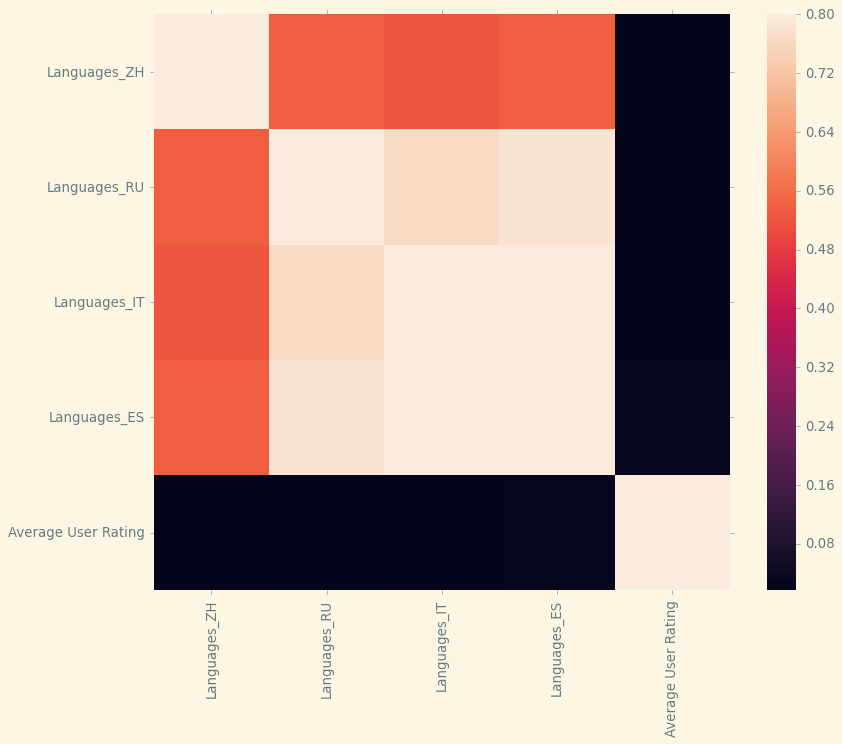

In [1270]:

columns_to_keep = [c for c in x_train_top_features.columns if c.startswith('Languages')]
df3 = pd.concat([x_train[columns_to_keep], y_train], axis=1)

corrmat = df3.corr()

# plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

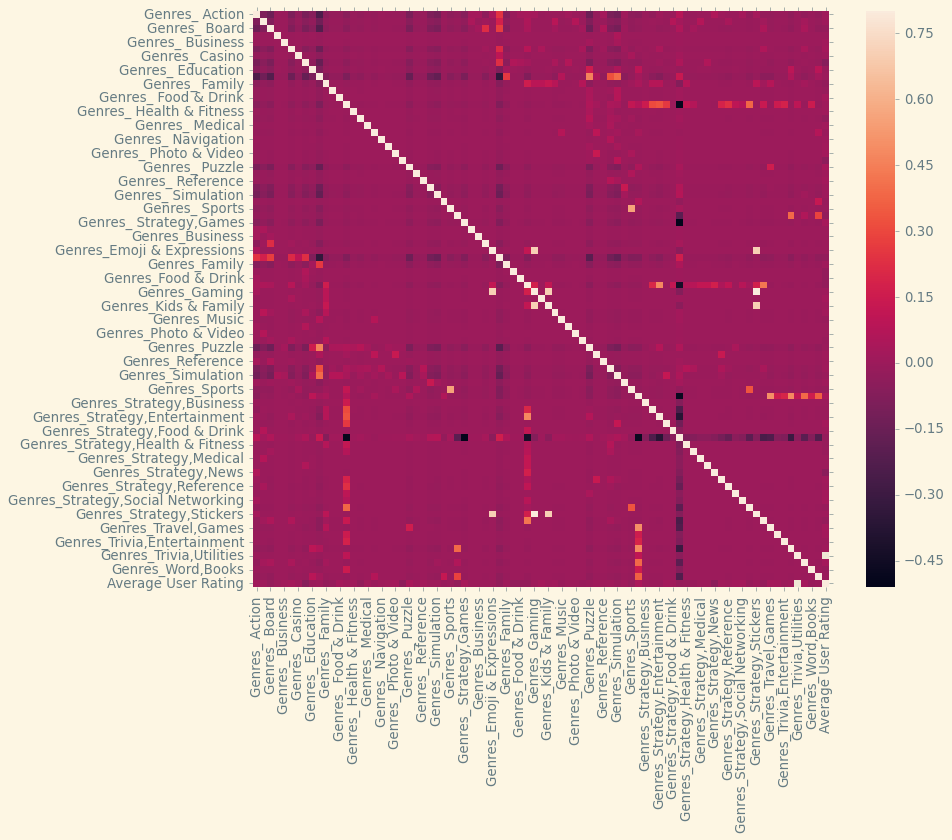

In [1271]:
# get the correlation matrix for columns that start with "Genres"
columns_to_keep = [c for c in x_train.columns if c.startswith('Genres')]
df2 = pd.concat([x_train[columns_to_keep], y_train], axis=1)

corrmat = df2.corr()

# plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

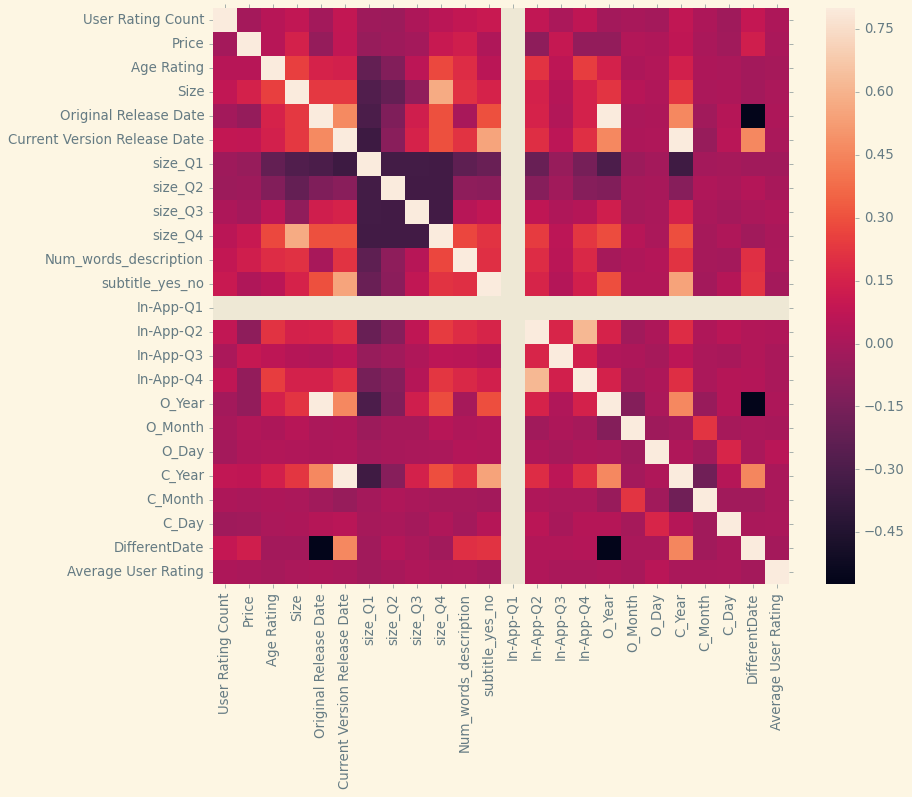

In [1272]:

# combine x_train and y_train into a single DataFrame
data = pd.concat([x_train, y_train], axis=1)

# get the correlation matrix for the combined data
corrmat = data.corr()

# drop columns that start with "Languages"
columns_to_drop1 = [c for c in corrmat.columns if c.startswith('Languages')]
corrmat = corrmat.drop(columns_to_drop1, axis=1).drop(columns_to_drop1, axis=0)

# drop columns that start with "Genres"
columns_to_drop3 = [c for c in corrmat.columns if c.startswith('Genres')]
corrmat = corrmat.drop(columns_to_drop3, axis=1).drop(columns_to_drop3, axis=0)

# plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [1273]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the TfidfVectorizer class with desired parameters
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the "Description" feature in x_train
x_train_description_encoded = tfidf.fit_transform(x_train['Description'])

# Transform the "Description" feature in x_test
x_test_description_encoded = tfidf.transform(x_test['Description'])

# Combine the encoded "Description" feature with other features in both x_train and x_test
x_train = pd.concat([x_train.drop('Description', axis=1), pd.DataFrame(x_train_description_encoded.toarray())], axis=1)
x_test = pd.concat([x_test.drop('Description', axis=1), pd.DataFrame(x_test_description_encoded.toarray())], axis=1)

# Get the feature names from the TfidfVectorizer object
tfidf_feature_names = tfidf.get_feature_names()

# Define the list of features to use
features = ["User Rating Count", "Age Rating", "Price", "Size", "Primary Genre", "Languages_EN", "Genres_Games", "Genres_Strategy", "In-app Purchases"]
features += tfidf_feature_names  # add the encoded "Description" features

# Create a machine learning model and fit it on the training data
model = RandomForestRegressor(random_state=42)
model.fit(x_train[features], y_train)

# Make predictions on the testing data and evaluate the model performance
predictions = model.predict(x_test[features])
score = model.score(x_test[features], y_test)
print(f"Model score: {score}")
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Create an instance of the TfidfVectorizer class with desired parameters\ntfidf = TfidfVectorizer(max_features=1000, stop_words=\'english\')\n\n# Fit and transform the "Description" feature in x_train\nx_train_description_encoded = tfidf.fit_transform(x_train[\'Description\'])\n\n# Transform the "Description" feature in x_test\nx_test_description_encoded = tfidf.transform(x_test[\'Description\'])\n\n# Combine the encoded "Description" feature with other features in both x_train and x_test\nx_train = pd.concat([x_train.drop(\'Description\', axis=1), pd.DataFrame(x_train_description_encoded.toarray())], axis=1)\nx_test = pd.concat([x_test.drop(\'Description\', axis=1), pd.DataFrame(x_test_description_encoded.toarray())], axis=1)\n\n# Get the feature names from the TfidfVectorizer object\ntfidf_feature_names = tfidf.get_feature_names()\n\n# Define the list of features to 

In [1274]:
import torch
from transformers import BertTokenizer, BertModel
def encode_text(text):
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Tokenize text and convert to tensors
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']

    # Pass tokens through BERT model to obtain embeddings
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state[:, 0, :].squeeze()

    # Convert embeddings to numpy array
    embeddings = embeddings.numpy()

    return embeddings

In [1275]:
#x_train["Description"] = np.array([encode_text(text) for text in x_train["Description"]])
#x_test["Description"] = np.array([encode_text(text) for text in x_test["Description"]])

Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. Here are some commonly used regression techniques:

1. Linear Regression: Linear regression is a simple regression technique that models the relationship between a dependent variable and one independent variable. It assumes that the relationship between the two variables is linear.

2. Multiple Regression: Multiple regression is an extension of linear regression that models the relationship between a dependent variable and two or more independent variables.

3. Polynomial Regression: Polynomial regression is a type of regression that models the relationship between a dependent variable and an independent variable using a polynomial function.

4. Logistic Regression: Logistic regression is a regression technique used when the dependent variable is categorical. It models the probability of the dependent variable being in a certain category based on the independent variables.

5. Ridge Regression: Ridge regression is a type of linear regression that is used when there is multicollinearity among the independent variables. It adds a penalty term to the regression equation to address this.

6. Lasso Regression: Lasso regression is another type of linear regression that addresses multicollinearity by adding a penalty term to the regression equation. However, unlike ridge regression, lasso regression penalizes the absolute size of the coefficients.

7. Elastic Net Regression: Elastic net regression is a combination of ridge and lasso regression. It adds both L1 and L2 penalties to the regression equation.

8. Time Series Regression: Time series regression is a regression technique used when the data is collected over time. It models the relationship between a dependent variable and one or more independent variables that are time-dependent.

9. Bayesian Regression: Bayesian regression is a type of regression that uses Bayesian inference to estimate the parameters of the regression equation.

10. Nonlinear Regression: Nonlinear regression is a type of regression that models the relationship between a dependent variable and one or more independent variables using a nonlinear function.

In [ ]:

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.inspection import plot_partial_dependence


def apply_pca(X, num_components):
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    return X_pca


def scatter_plot(y_actual, y_predict):
    plt.scatter(y_actual, y_predict)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Add the regression line
    m, b = np.polyfit(y_actual, y_predict, 1)
    plt.plot(y_actual, m*y_actual + b, color='red')

    plt.show()


def residual_plot(y_actual, y_predict):
    residuals = y_actual - y_predict
    plt.scatter(y_predict, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Add the regression line
    plt.axhline(y=0, color='red')
    
    plt.show()


def feature_importance_plot(features, feature_importances):
    plt.barh(features, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.show()

def decision_boundary_plot(X, y, model):
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X)

    # Meshgrid for decision boundary visualization
    h = 0.02  # step size in the mesh
    x_min, x_max = np.min(X_pca[:, 0]) - 1, np.max(X_pca[:, 0]) + 1
    y_min, y_max = np.min(X_pca[:, 1]) - 1, np.max(X_pca[:, 1]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    X_mesh_pca = pca.inverse_transform(X_mesh)
    Z = model.predict(X_mesh_pca)
    Z = Z.reshape(xx.shape)

    # Plotting the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


def confusion_matrix_plot(y_actual, y_predict):
    cm = confusion_matrix(y_actual, y_predict)

    # Plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


def tree_visualization_plot(model, feature_names, class_names):
    # Access the best estimator from the GridSearchCV object
    best_estimator = model.best_estimator_

    # Plotting the decision tree
    plt.figure(figsize=(10, 6))
    plot_tree(best_estimator, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)
    plt.show()


def partial_dependence_plot(model, X):
    X_pca = apply_pca(X, num_components=1)

    fig, axs = plot_partial_dependence(model, X_pca, [0])  # Change [0] to the desired principal component index
    plt.show()

In [1276]:
# Normalize the training and test features
scaler = StandardScaler()
x_train_top_features_norm = scaler.fit_transform(x_train_top_features)
x_test_top_features_norm = scaler.transform(x_test_top_features)

# Define the regression models
lr = LinearRegression()
mr = LinearRegression()
pr = make_pipeline(PolynomialFeatures(1), LinearRegression())
rr = Ridge(alpha=0.01)
lr_lasso = Lasso(alpha=0.01)
en = ElasticNet(alpha=0.01, l1_ratio=0.5)
br = BayesianRidge()

# Define the boosting and bagging models
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=42)
bgr = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, random_state=42)
rfr = RandomForestRegressor(n_estimators=1000,max_depth=7, random_state=42)

# Train and evaluate the models
models = [mr, pr, rr, lr_lasso, en, br, gbr, bgr, rfr]
model_names = ['Multiple Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', 'Bayesian Regression', 'Gradient Boosting Regression', 'Bagging Regression', 'Random Forest Regression']

# Train and evaluate the model
lr.fit(x_train_top_features_norm[:,0].reshape(-1,1), y_train)
y_pred = lr.predict(x_test_top_features_norm[:,0].reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)

print('Linear Regression:')
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)
print()

scatter_plot(y_test, y_pred)

for i, important in enumerate(models):
    important.fit(x_train_top_features_norm, y_train)
    y_pred = important.predict(x_test_top_features_norm)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = r2_score(y_test, y_pred)
    print(model_names[i], ':')
    print('Mean Squared Error: ', mse)
    print('Accuracy: ', accuracy)
    print()

    if(model_names[i] == 'Multiple Regression'):
        residual_plot(y_test, y_pred)
    elif(model_names[i] == 'Polynomial Regression'):
        scatter_plot(y_test, y_pred)
    elif(model_names[i] == 'Ridge Regression' or model_names[i] == 'Lasso Regression' or model_names[i] == 'Elastic Net Regression' or model_names[i] == 'Bayesian Regression'):
        feature_importance_plot(top_feature_indices, np.abs(important.coef_))
    elif(model_names[i] != 'Bagging Regression'):
        feature_importance_plot(top_feature_indices, important.feature_importances_)

Linear Regression:
Mean Squared Error:  0.5822829000753956
Accuracy:  -0.014477784233273283

Multiple Regression :
Mean Squared Error:  0.512520748900681
Accuracy:  0.10706477272298842

Polynomial Regression :
Mean Squared Error:  0.5109239666340032
Accuracy:  0.10984675401694799

Ridge Regression :
Mean Squared Error:  0.5115957762897355
Accuracy:  0.10867629894968511

Lasso Regression :
Mean Squared Error:  0.5097508637571184
Accuracy:  0.11189058323993517

Elastic Net Regression :
Mean Squared Error:  0.5098906702576074
Accuracy:  0.11164700646854264

Bayesian Regression :
Mean Squared Error:  0.5110729548346615
Accuracy:  0.10958718050094551

Gradient Boosting Regression :
Mean Squared Error:  0.44443822370146213
Accuracy:  0.22568101458783874

Bagging Regression :
Mean Squared Error:  0.512835173516567
Accuracy:  0.10651696891904516

Random Forest Regression :
Mean Squared Error:  0.4487413797753656
Accuracy:  0.2181838749011018



In [1277]:
x_test_top_features_norm.shape

(1043, 40)

In [1278]:
xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb.fit(x_train_top_features_norm, y_train)
y_pred = xgb.predict(x_test_top_features_norm)
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)
print('XGBRegressor :')
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)
print()


[04:26:22] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor :
Mean Squared Error:  0.4883720256947372
Accuracy:  0.14913769502047725



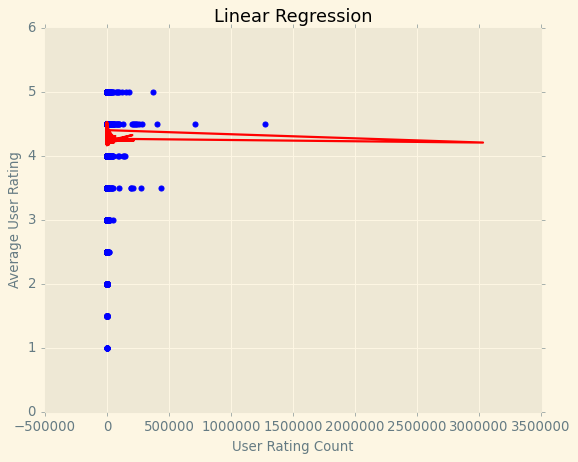

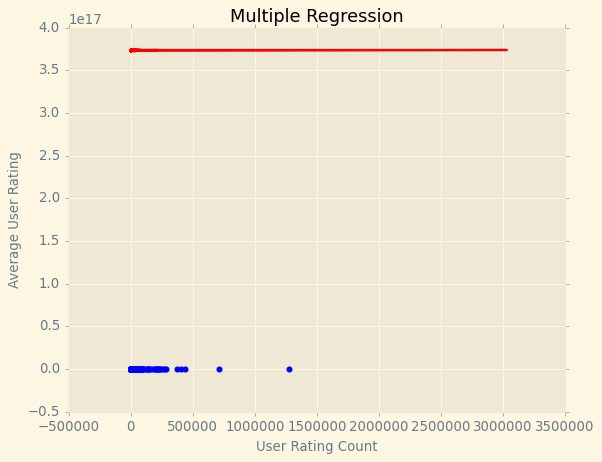

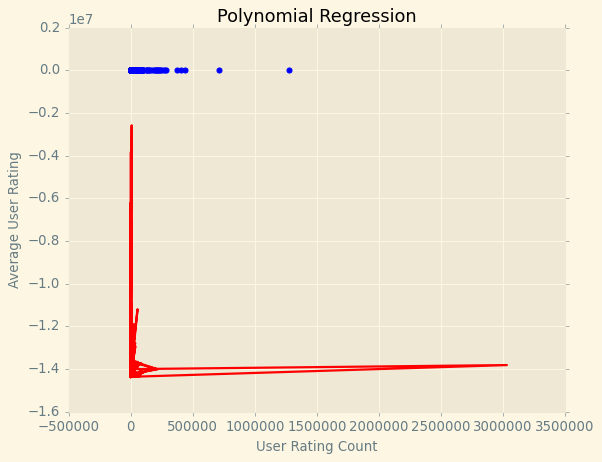

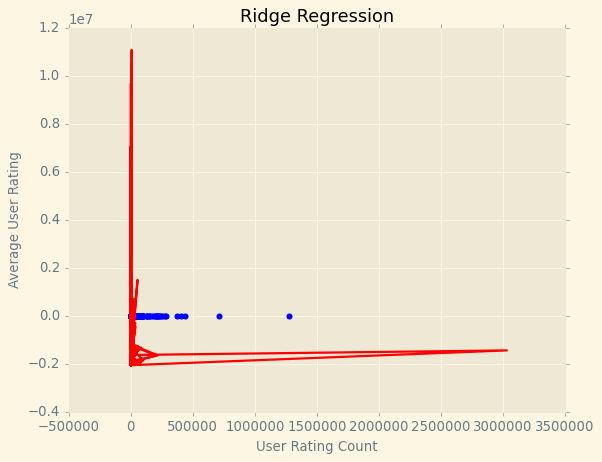

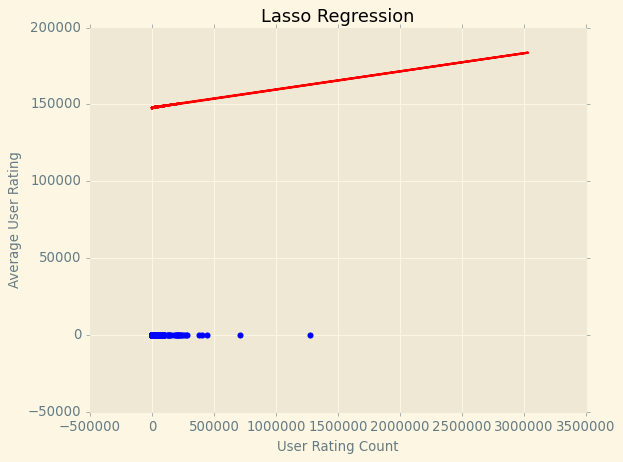

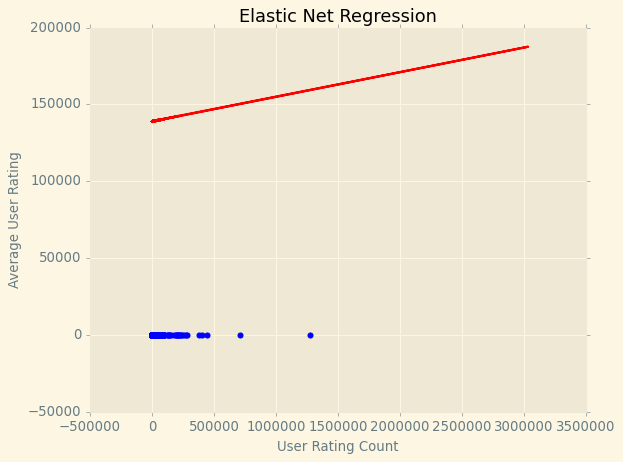

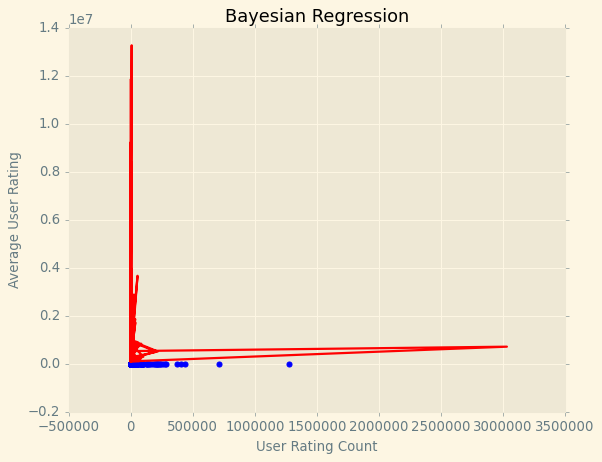

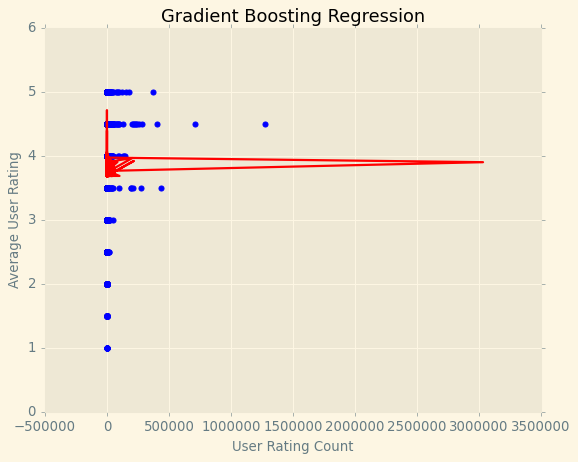

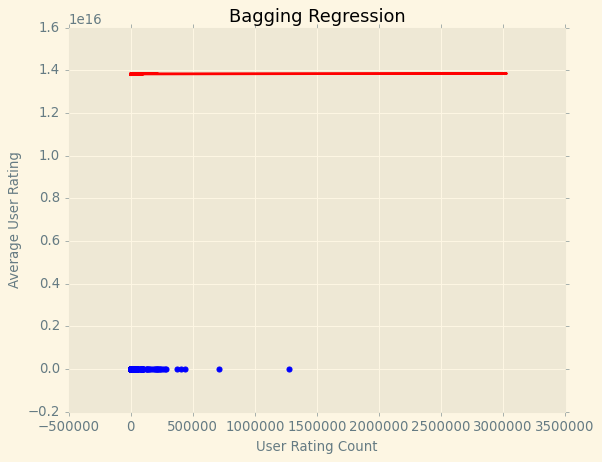

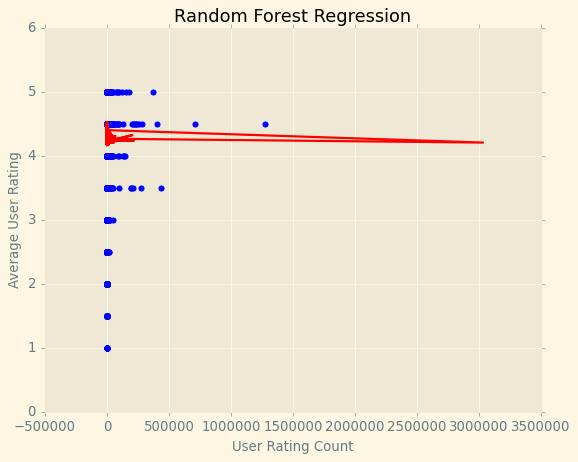

In [1279]:
# Linear Regression
feature_name = x_train_top_features.iloc[:, [0]].columns[0]
plt.scatter(x_train_top_features.iloc[:, [0]], y_train, color='blue')
plt.plot(x_test_top_features.iloc[:, [0]], important.predict(x_test_top_features), color='red')
plt.title("Linear Regression")
plt.xlabel(feature_name)
plt.ylabel('Average User Rating')
plt.show()

# Loop through the models and plot the regression line for each one
for i, important in enumerate(models):
    feature_name = x_train_top_features.columns[0]
    plt.scatter(x_train_top_features.iloc[:, 0], y_train, color='blue')
    plt.plot(x_test_top_features.iloc[:, 0], important.predict(x_test_top_features), color='red')
    plt.title(model_names[i])
    plt.xlabel(feature_name)
    plt.ylabel('Average User Rating')
    plt.show()

In [1280]:
import pickle

models = [encoder, MLB, multiLB, scaler, lr, rr, lr_lasso, en, br, bgr, rfr, xgb]
model_names = ['encoder','MLB', 'multiLB', 'scaler', 'lr', 'rr', 'lr_lasso', 'en', 'br', 'bgr', 'rfr', 'xgb']

for i, model in enumerate(models):
    pickle_file = f"{model_names[i]}.pkl"
    pickle.dump(model, open(pickle_file, 'wb'))

In [1281]:
pickle_out = open("mr.pickle","wb")
pickle.dump(mr, pickle_out)
pickle_out.close()

pickle_out = open("pr.pickle","wb")
pickle.dump(mr, pickle_out)
pickle_out.close()

pickle_out = open("gbr.sav","wb")
pickle.dump(gbr, pickle_out)
pickle_out.close()

In [1282]:
pickle_in = open("gbr.sav","rb")
Scaler = pickle.load(pickle_in)
print(Scaler)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000,
                          random_state=42)


In [1283]:
import pickle

pickle_file ="gbr.sav"
pickle.dump(rfr, open(pickle_file, 'wb'))

loaded_model = pickle.load(open(pickle_file,'rb'))
pred_y=loaded_model.predict(x_test_top_features_norm)

mse = mean_squared_error(y_test, pred_y)
accuracy = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)
print()

Mean Squared Error:  0.4487413797753656
Accuracy:  0.14913769502047725



In [1284]:
loaded_model.n_features_

40

In [1285]:
def preprocess_input(data, encoder, MLB, multiLB, top_features, scaler):
    
    if(data['Languages'].isnull().sum()):
        data['Languages'] = data['Languages'].fillna('EN')

    data['size_Q1'] = data['Size'].apply(lambda x: 1 if x < 2.751732e+07 else 0)
    data['size_Q2'] = data['Size'].apply(lambda x: 1 if 2.751732e+07 <= x < 6.740582e+07 else 0)
    data['size_Q3'] = data['Size'].apply(lambda x: 1 if 6.740582e+07 <= x < 1.592689e+08 else 0)
    data['size_Q4'] = data['Size'].apply(lambda x: 1 if x >= 1.592689e+08 else 0)

    data['Num_words_description'] = data['Description'].apply(lambda x: len(re.findall('(\w+)',str(x))))

    if(data['Subtitle'].isnull().iloc[0]):
        data['Subtitle'] = data['Subtitle'].fillna('')
    data['subtitle_yes_no'] = data['Subtitle'].apply(lambda x: 0 if x == '' else 1)

    if(data['In-app Purchases'].isnull().sum()):
        data['In-app Purchases'] = data['In-app Purchases'].fillna('0.0') #No data will be taken as $0
    data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: '0.0' if x == '0' else x) #for consistency
    data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: x.split(', ')) #turn string into list

    # Prices range from 0 to 99.99. Split into 4 quadrants
    data['In-App-Q1'] = data['In-app Purchases'].apply(lambda x: 1 if any(float(i) < 25 for i in x) else 0) #prices from 0 to 24.99
    data['In-App-Q2'] = data['In-app Purchases'].apply(lambda x: 1 if any(25 <= float(i) < 50 for i in x) else 0) #prices from 25 to 49.99
    data['In-App-Q3'] = data['In-app Purchases'].apply(lambda x: 1 if any(50 <= float(i) < 75 for i in x) else 0) #prices from 50 to 74.99
    data['In-App-Q4'] = data['In-app Purchases'].apply(lambda x: 1 if any(75 <= float(i) < 100 for i in x) else 0) #prices from 75 to 99.99
    
    data['Primary Genre'] = encoder.transform(data['Primary Genre'])

    scale_mapper = {"4+":4, "9+":9, "12+":12, "17+":17}
    data["Age Rating"] = data["Age Rating"].replace(scale_mapper)
    
    date(data,'Original Release Date')
    date(data,'Current Version Release Date')
    data['DifferentDate'] = data['Current Version Release Date'] - data['Original Release Date']
    
    print(data.shape)

    data['Languages'] = data["Languages"].str.split(", ")
    for i in data["Languages"]:
        if(type(i)== float):
            print(i)
    x_Languages_encoded = MLB.transform(data["Languages"])
    new_feature_names = ['Languages_' + name for name in MLB.classes_]
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(x_Languages_encoded, columns=new_feature_names)], axis=1)    

    data['Genres'] = data["Genres"].str.split(", ")
    x_test_developer_encoded = multiLB.transform(data["Genres"])
    new_feature_names = ['Genres_' + name for name in multiLB.classes_]
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(x_test_developer_encoded, columns=new_feature_names)], axis=1)    

    data = data.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres'],axis=1)
    
    data= data[top_features]
    #print(data)
    data_norm = scaler.transform(data)
    return data_norm


In [1286]:
array = ['https://apps.apple.com/us/app/heir-of-light/id1264483706', 1264483706, 'HEIR OF LIGHT', 'Dark Fantasy RPG',	'https://is3-ssl.mzstatic.com/image/thumb/Purple123/v4/1b/0a/0f/1b0a0fd3-18f7-1889-8ddb-dce2c71784c9/source/512x512bb.jpg',	982, 0,	'29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, 29.99, 29.99, 8.99, 9.99, 29.99, 29.99, 9.99, 9.99, 14.99',	'A Dark Fantasy, Collectible RPG\n\nDarkness has overtaken the realm, and the world is in chaos. The only hope to restore light and order lies with you, an Heir of Light. Embark on a crusade to renew a hope that has been lost for generations. Ready your weapon and journey to restore the light of the world!\n\nFeatures\n\n\u25a0 Be A Light in the Darkness\n- Shine light upon a world shrouded in darkness. The war will only end when light shines upon every inch of the land.\n- Expand the territory in any direction you desire!\n- Mobs are no longer in your way, Exclusive Boss Battles Only!\n\n\u25a0 Collect Powerful Servants\n- Summon powerful Servants to fight at your side.\n- Form your Crusade from among over 350 Servants.\n- Enhance, Evolve, and Awaken to unlock their true potential.\n- Diverse Roles for each Servant: Attack, Defense, Support, Healer.\n\n\u25a0 Devise and Strategize\n- Your Servants are the key of your Crusade, customize their Skills for every battle.\n- Customize your Gear Combination to gain unique Set Effects.\n- Couple the various different Skills and Elements to assemble the most strategic Crusade. \n\n\u25a0 Heed the Savage Battlefield\n- Pulverize your opponents in PvP mode to prove your power.\n- Preserve your Towers! Defense is the first step in strategic combat.\n- Challenge yourself to various dungeons and earn rare rewards. Godspeed!\n\n\u25a0 An Eerie and Mysterious World\n- Not just another RPG! Immerse yourself in a magical and mysterious fantasy world.\n- Cute yet bizarre, uncanny yet charming! Servants are ready to accompany you on your journey.\n\nSubscription - Repeat Battle I\n- Repeat Battle 150 times / 10% Bonus Gold\n- Karats & Valor sent daily!\n- $8.99 monthly (Price may vary by location)\n\n- Payment will be charged to your iTunes account at confirmation of purchase.\n- Your subscription automatically renews unless auto-renewal is turned off at least 24-hours before the end of the current period.\n- Your account will be charged for renewal within 24-hours prior to the end of the current period.\n- Subscriptions may be managed by the user, and auto-renewal may be turned off by going to the user\u2019s Account Settings after purchase.\n- Any unused portion of a free trial period, if offered, will be forfeited when the user purchases a subscription.\n- Terms of Use: http://terms.withhive.com/terms/policy/view/M5\n- Privacy Policy: http://terms.withhive.com/terms/policy/view/M5/T3\n\n* Moot community : https://moot.us/lounges/178/\n\n** This game is available in \ud55c\uad6d\uc5b4, English, \u65e5\u672c\u8a9e, \u4e2d\u6587\u7b80\u4f53, \u4e2d\u6587\u7e41\u9ad4, Deutsch, Fran\xe7ais, Espa\xf1ol, Vietnam, \u0e44\u0e17\u0e22.\n** There may be additional costs when trying to obtain certain items.\n\n* Access authorization notice for gameplay\nCAMERA: HIVE requires access to your camera to take profile images.\nCONTACTS: HIVE requires access to your contacts to find friends.\nPHOTOS: HIVE requires access to your photos to change profile images or save/load the game screen.\n\n* GAMEVIL Official Website : https://www.withhive.com\n* GAMEVIL Customer Support : https://m.withhive.com/customer/inquire',	'GAMEVIL Inc.',	'12+',	'EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI',	894489600,	'Games',	'Games, Role Playing, Strategy',	'6/3/2018',	'31/07/2019',	4]

In [1287]:
df = pd.DataFrame([array])

df.columns = ['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count', 'Price', 'In-app Purchases', 
                       'Description', 'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre', 'Genres', 
                       'Original Release Date', 'Current Version Release Date', 'Average User Rating']

df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date', 'Average User Rating'],
      dtype='object')

In [1288]:
import pickle

# Assuming that `top_feature_indices` is already defined
pickle_file = "top_feature_indices.pkl"
pickle.dump(top_feature_indices, open(pickle_file, 'wb'))

pickle_file = "top_feature_indices.pkl"
top = pickle.load(open(pickle_file,'rb'))

print(top)

Index(['User Rating Count', 'Original Release Date', 'Size',
       'Num_words_description', 'Current Version Release Date',
       'DifferentDate', 'O_Day', 'C_Day', 'C_Month', 'O_Month', 'Price',
       'Age Rating', 'Genres_Simulation', 'Genres_ Simulation',
       'Genres_Puzzle', 'Genres_ Board', 'Genres_ Puzzle',
       'Genres_Entertainment', 'O_Year', 'In-App-Q2', 'C_Year',
       'Genres_ Entertainment', 'Genres_ Action', 'size_Q3',
       'Genres_ Adventure', 'subtitle_yes_no', 'Genres_ Casual', 'size_Q2',
       'Genres_ Role Playing', 'Languages_ZH', 'Languages_RU',
       'Genres_Strategy,Games', 'Genres_Role Playing', 'In-App-Q4',
       'Genres_Strategy,Entertainment', 'Genres_Strategy,Reference',
       'Genres_Family', 'Languages_IT', 'Genres_ Card', 'Languages_ES'],
      dtype='object')


In [1289]:
sample= preprocess_input(df,encoder, MLB, multiLB, top, scaler)
print(sample)
print(col)

(1, 35)
[[-0.07914068  1.46359552  3.02432051  1.52252598  1.24348022 -0.31680952
  -1.08998733  1.69853635  0.13820161 -1.06250772 -0.22660985  1.37141884
  -0.30921407 -0.27838706 -0.37780911 -0.36527238 -0.26412398 -0.54160256
   1.59870218  2.28794201  1.1899673  -0.62328326 -0.39866407 -0.57670431
  -0.217257    1.62664656 -0.26308368 -0.57596607 -0.22559794  1.98395934
  -0.46593938 -3.31966458  4.18781301 -0.32433536 -0.11235846 -0.04902314
  -0.16988344 -0.44405759 -0.22909712  1.9973068 ]]
Average User Rating


In [1293]:
import os
# Define the list of models and their names


def load_models():
    model_names = ['encoder', 'MLB', 'multiLB', 'scaler', 'lr', 'rr', 'lr_lasso', 'en', 'br', 'bgr', 'rfr', 'xgb']
    models = []
    # Load the models from their respective joblib files
    for name in model_names:
        pickle_file = f"{name}.pkl"
        pickle_file = os.path.join('D:/FCIS/Pattern/project/', pickle_file)
        model = pickle.load(open(pickle_file,'rb'))
        models.append(model)
    
    pickle_in = open("D:/FCIS/Pattern/project/mr.pickle","rb")
    mr = pickle.load(pickle_in)
    pickle_in = open("D:/FCIS/Pattern/project/pr.pickle","rb")
    pr = pickle.load(pickle_in)
    models.append(mr)
    models.append(pr)
    model_names.append('mr')
    model_names.append('pr')
    return models

In [1294]:
load_models()

[LabelEncoder(),
 MultiLabelBinarizer(),
 MultiLabelBinarizer(),
 StandardScaler(),
 LinearRegression(),
 Ridge(alpha=0.01),
 Lasso(alpha=0.01),
 ElasticNet(alpha=0.01),
 BayesianRidge(),
 BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000,
                  random_state=42),
 RandomForestRegressor(max_depth=7, n_estimators=1000, random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
  

In [1295]:
print(len(model_names))

12


In [1296]:
def make_prediction(data, Y, models):
    #data = data.reshape((len(data), 1))

    # Apply the trained regression models to the input data
    predictions = []
    mse_scores = []
    r2_scores = []
    prediction = models[4].predict(data[:,0].reshape(-1,1))
    print(y_pred.shape)
    print(Y.shape)
    mse = mean_squared_error(Y, prediction)
    r2 = r2_score(Y, prediction)
    predictions.append((model_names[5], prediction))
    mse_scores.append(mse)
    r2_scores.append(r2)
    for i in range(5, len(models)):
        print(i)
        model_name = model_names[i]
        model = models[i]
        prediction = model.predict(data)
        mse = mean_squared_error(Y, prediction)
        r2 = r2_score(Y, prediction)
        predictions.append((model_name, prediction))
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    return predictions, mse_scores, r2_scores

In [1297]:
#predictions, mse_scores, r2_scores = make_prediction(test,Y)
#predictions